import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
filename = 'trainable_last_large_beta'
image_title = '$\\|\\beta\\|_2^2$: 16, Trainable: last layer'
plotly_title = r'$\|\beta\|_2^2$: 16, Trainable: last layer'
exp = 'summary/' + filename + '.txt'
with open(exp) as fh:
    out = fh.read()

out = re.split(r'\n', out)

dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue

#dict_list = [eval(d) for d in out]
df = pd.DataFrame(dict_list)
#df['lipton-excess'] = (df['lipton'] - df['bayes_error']).astype('float32') 
#df['oracle-excess'] = (df['oracle'] - df['bayes_error']).astype('float32') 
df.dtypes

measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['nodes', 'epochs'], as_index=False).agg(agg_dict)
result

epochs_list = np.unique(df['epochs'])
color_list = 'bgrcyk'

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
for epochs, color in zip(epochs_list, color_list):
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    ax[0].plot(nodes, mean, color)
    ax[0].errorbar(nodes, mean, std)
    ax[0].set_yscale('log')
    ax[0].set_xscale('log')
    ax[0].set_title('Test MSE (Minority)')
    ax[0].set_xlabel('nodes')


    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    ax[1].plot(nodes, mean, color)
    ax[1].errorbar(nodes, mean, std)
    ax[1].set_yscale('log')
    ax[1].set_xscale('log')
    ax[1].set_title('Test MSE (Majority)')
    ax[1].set_xlabel('nodes')

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    ax[2].plot(nodes, mean, color)
    ax[2].errorbar(nodes, mean, std)
    ax[2].set_yscale('log')
    ax[2].set_xscale('log')
    ax[2].set_title('Train MSE (Overall)')
    ax[2].set_xlabel('nodes')

fig.suptitle(image_title)
plt.legend(epochs_list, title='epochs')
plt.savefig('pdf_plots/' + filename + '.pdf')

epochs_list = np.unique(df['epochs'])
color_list=['red', 'green', 'blue', 'black', 'purple', 'orange']

from plotly.subplots import make_subplots
import plotly.graph_objects as go
import plotly
fig = make_subplots(rows = 1, cols=3, subplot_titles=['Test MSE (minority)', 'Test MSE (majority)', 'Train MSE (overall)'])
for epochs, color in zip(epochs_list, color_list):
    line = go.scatter.Line(color = color)
    result1 = result.loc[result['epochs']==epochs]
    nodes, mean, std, count = result1['nodes'], result1['minority-mse']['mean'], result1['minority-mse']['std'],\
     result1['minority-mse']['count']
    error_y = dict(type = 'data', array = std, color = color, width = 0, thickness = 0.9)
    marker = dict(size = 3)
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker, name = str(epochs),\
         legendgroup = str(epochs), showlegend = False), row = 1, col = 1)

    mean, std, count = result1['majority-mse']['mean'], result1['majority-mse']['std'], result1['majority-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line,  error_y = error_y, marker = marker, name = str(epochs),\
        legendgroup = str(epochs), showlegend = False), row = 1, col = 2)

    mean, std, count = result1['train-mse']['mean'], result1['train-mse']['std'], result1['train-mse']['count']
    error_y['array'] = std
    fig.append_trace(go.Scatter(x = nodes, y = mean, line = line, error_y = error_y, marker = marker,  name = str(epochs),\
        legendgroup = str(epochs), showlegend = True), row = 1, col = 3)


fig.update_xaxes(type = 'log', title = 'nodes')
fig.update_layout(height = 400, width = 1000, legend_title_text='epochs', title = plotly_title)

fig.show()
plotly.offline.plot(fig, filename = 'html_plots/' + filename + '.html')

In [1]:
import re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
with open('summary/mse3.txt', 'r') as f:
    out = f.read()
out = re.split(r'\n', out)
dict_list = []
for d in out:
    try:
        f = eval(d)
        dict_list.append(f)
    except:
        continue



df = pd.DataFrame(dict_list)
df.dtypes
#df1 = df.loc[df['epochs'] == 5000]

nodes              int64
beta-norm        float64
train-mse        float64
train-mse-bal    float64
majority-mse     float64
minority-mse     float64
trainable         object
setup             object
dtype: object

In [4]:
measure = ['train-mse', 'majority-mse', 'minority-mse']
agg_dict = dict()
for key in measure:
    agg_dict[key] = ['mean', 'std', 'count']
result = df.groupby(['setup', 'beta-norm',  'nodes'], as_index=False).agg(agg_dict)
result.loc[result['setup']=='diff-core']

setup beta-norm  nodes     train-mse                     majority-mse  \
                                        mean           std count         mean   
0   diff-core      0.01     10  4.349905e-01  1.343758e-01   500     0.062620   
1   diff-core      0.01     20  3.970258e-01  1.186362e-01   500     0.104454   
2   diff-core      0.01     40  3.419012e-01  9.756960e-02   500     0.180849   
3   diff-core      0.01     80  2.439201e-01  7.031783e-02   500     0.392184   
4   diff-core      0.01    160  7.398017e-02  2.501277e-02   500     2.013846   
5   diff-core      0.01    320  2.624695e-29  1.267794e-29   500     1.135141   
6   diff-core      0.01    640  2.141711e-29  1.597200e-28   500     0.550320   
7   diff-core      0.01   1280  1.103631e-29  6.477999e-30   500     0.413577   
8   diff-core      0.01   2560  1.011396e-29  7.448222e-30   500     0.359483   
9   diff-core      0.01   5120  8.962980e-30  5.657928e-30   500     0.335844   
10  diff-core      0.01  10240  8.971297e-30  6.078767e-30   500     0.324595   
11  diff-core      0.01  20480  8.652626e-30  5.507921e-30   500     0.318828   
12  diff-core      0.01  40960  8.751733e-30  6.475724e-30   500     0.315767   
13  diff-core      0.01  81920  9.365128e-30  7.014056e-30   500     0.314992   
14  diff-core      1.00     10  2.607650e+00  7.092197e-01   500     2.462458   
15  diff-core      1.00     20  1.297970e+00  3.523072e-01   500     1.241377   
16  diff-core      1.00     40  5.970912e-01  1.347504e-01   500     0.592573   
17  diff-core      1.00     80  2.872969e-01  7.733271e-02   500     0.516347   
18  diff-core      1.00    160  7.879032e-02  2.605226e-02   500     2.141660   
19  diff-core      1.00    320  1.972136e-28  2.304808e-28   500     1.166568   
20  diff-core      1.00    640  1.862454e-28  2.343125e-28   500     0.557166   
21  diff-core      1.00   1280  1.986877e-28  2.333772e-28   500     0.415784   
22  diff-core      1.00   2560  1.883050e-28  2.425506e-28   500     0.358896   
23  diff-core      1.00   5120  2.045719e-28  2.577137e-28   500     0.333158   
24  diff-core      1.00  10240  2.040726e-28  2.441560e-28   500     0.322154   
25  diff-core      1.00  20480  2.140843e-28  2.738350e-28   500     0.316640   
26  diff-core      1.00  40960  2.058491e-28  2.768149e-28   500     0.313698   
27  diff-core      1.00  81920  2.025477e-28  2.487491e-28   500     0.312610   
28  diff-core     10.00     10  2.175471e+02  6.368239e+01   500   240.793595   
29  diff-core     10.00     20  8.987372e+01  2.992803e+01   500   112.651721   
30  diff-core     10.00     40  2.562401e+01  8.729099e+00   500    42.468061   
31  diff-core     10.00     80  3.719443e+00  1.069605e+00   500    11.855525   
32  diff-core     10.00    160  3.206457e-01  9.202694e-02   500    10.396613   
33  diff-core     10.00    320  1.749317e-26  2.151349e-26   500     3.080904   
34  diff-core     10.00    640  1.788934e-26  2.352351e-26   500     1.109522   
35  diff-core     10.00   1280  1.830897e-26  2.367856e-26   500     0.641075   
36  diff-core     10.00   2560  1.815026e-26  2.122047e-26   500     0.469376   
37  diff-core     10.00   5120  2.069954e-26  2.771650e-26   500     0.387112   
38  diff-core     10.00  10240  1.905436e-26  2.590088e-26   500     0.348979   
39  diff-core     10.00  20480  2.101439e-26  2.887866e-26   500     0.331174   
40  diff-core     10.00  40960  2.113740e-26  2.555698e-26   500     0.322249   
41  diff-core     10.00  81920  2.039649e-26  2.479557e-26   500     0.317593   

                    minority-mse                   
          std count         mean        std count  
0    0.033945   500     4.550899   0.279173   500  
1    0.051462   500     4.344376   0.296511   500  
2    0.084521   500     4.291957   0.298129   500  
3    0.144559   500     4.447497   0.327968   500  
4    0.712625   500     6.046179   0.735990   500  
5    0.332470   500     5.189561   0.435679   500  
6    0.164556   500     4.6

fig, ax = plt.subplots(1, 3, figsize = (18, 5), sharex=True)
betas = [1, 5, 10]
for i, beta in enumerate(betas):
    result1 = result.loc[result['beta-norm']==beta]
    nodes, mean_minor, std_minor = result1['nodes'],\
         result1['minority-mse']['mean'], result1['minority-mse']['std']

    mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
    mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
    ax[i].errorbar(nodes, mean_minor, std_minor, color = 'k', linestyle = '-', marker = '*')
    ax[i].errorbar(nodes, mean_major, std_major, color = 'orange', linestyle = '-', marker = '+')
    ax[i].errorbar(nodes, mean_tr, std_tr, color = 'g', linestyle = '-', marker = 'x')
    #ax[0].set_yscale('log')
    ax[i].set_xscale('log')
    ax[i].title.set_text(f'SNR={beta**2}')
lines = [Line2D([0], [0], color='k', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+'), \
        Line2D([0], [0], color='g', linestyle='-', marker='x')]  

plt.legend(lines, ['Minority', 'Majority', 'Balanced Train'], title='MSE')
#plt.title('$\\text{SNR}=\\frac{\\|\\beta\\|_2^2}{\\|\\delta\\|_2^2}$')
plt.savefig('pdf_plots/plot.pdf')

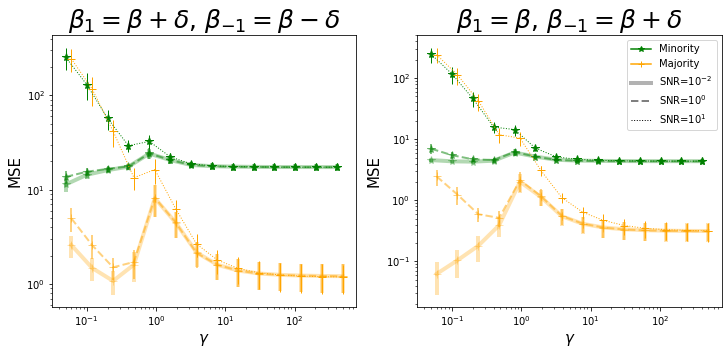

In [3]:
betas = [0.01, 1, 10]
ltys = ['-', '--', ':']
lws = [4, 2, 1]
alphas = [0.3, 0.5, 1]
add_on = 4 ** np.array(range(6))
#setups = ['same-core-over-envs', 'different-core-over-envs']
setups = ['same-core', 'diff-core']
names = ['$\\beta_{1} = \\beta + \\delta$, $\\beta_{-1} = \\beta - \\delta$',\
     '$\\beta_{1} = \\beta$, $\\beta_{-1} = \\beta + \\delta$']
fig, ax = plt.subplots(1, 2, figsize = (12, 5), sharex=True)
for s, (setup, name) in enumerate(zip(setups, names)):
    result_setup = result.loc[result['setup']==setup]
    for i, (beta, lty, lw, alpha) in enumerate(zip(betas, ltys, lws, alphas)):
        result1 = result_setup.loc[result['beta-norm']==beta]
        nodes, mean_minor, std_minor = result1['nodes'],\
            result1['minority-mse']['mean'], result1['minority-mse']['std']

        mean_major, std_major = result1['majority-mse']['mean'], result1['majority-mse']['std']
        mean_tr, std_tr = result1['train-mse']['mean'], result1['train-mse']['std']
    
        ax[s].errorbar(nodes/200, mean_minor, std_minor, color = 'g', linestyle = lty,\
             marker = '*', markersize = 8, lw = lw, alpha = alpha)
        ax[s].errorbar(nodes * (1.2)/200, mean_major, std_major, color = 'orange', linestyle = lty,\
         marker = '+', markersize = 8, lw = lw, alpha = alpha)
        #ax[s].errorbar(nodes * (1.4), mean_tr, std_tr, color = 'g', linestyle = lty, marker = 'x',\
         #markersize = 8, lw = lw, alpha = alpha)
        ax[s].set_yscale('log')
        ax[s].set_xscale('log')
        ax[s].set_xlabel('$\\gamma$', fontsize = 15)
        ax[s].set_ylabel('MSE', fontsize = 15)
        ax[s].set_title(name, fontsize = 25)
        #ax[s].set_ylim(0, 20)
        
    
lines = [Line2D([0], [0], color='g', linestyle='-', marker='*'), \
    Line2D([0], [0], color='orange', linestyle='-', marker='+')]#, \
        #Line2D([0], [0], color='g', linestyle='-', marker='x')\
        #]  
labels = ['Minority', 'Majority']#, 'Balanced Train']
for i, (beta, lty, lw, alpha) in enumerate(zip(betas, ltys, lws, alphas)):
    lines.append(Line2D([0], [0], color='k', linestyle=lty, lw = lw, alpha = alpha))
    j = i-1
    if j == -1:
        labels.append('SNR=$10^{-2}$')
    else:
        labels.append(f'SNR=$10^{j}$')
plt.legend(lines, labels, fontsize = 10)
plt.savefig('pdf_plots/plot.pdf')